# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
%matplotlib inline
    
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)


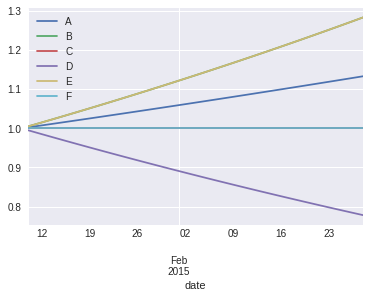

In [3]:
prices.plot()


In [4]:
prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


Now it's time to build the events DataFrame, the input will give to Alphalens.

Alphalens calculates statistics for those dates where the input DataFrame has values (not NaN). So to compute the performace analysis on specific dates and securities (like an event study) then we have to make sure the input DataFrame contains valid values only on those date/security combinations where the event happens. All the other values in the DataFrame must be NaN or not present.

Also, make sure the event values are positive (it doesn't matter the value but they must be positive) if you intend to go long on the events and use negative values if you intent to go short. This impacts the cumulative returns plots. 

Let's create the event DataFrame where we "mark" (any value) each day a security price fall below 30$. 

In [5]:
#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'

event = DataFrame(index=factor_index, columns=tickers,
                   data=[[1, nan, nan, nan, nan, nan],
                         [4, nan, nan, 7, nan, nan],
                         [nan, nan, nan, nan, nan, nan],
                         [nan, 3, nan, 2, nan, nan],
                         [1, nan, nan, nan, nan, nan],
                         [nan, nan, 2, nan, nan, nan],
                         [nan, nan, nan, 2, nan, nan],
                         [nan, nan, nan, 1, nan, nan],
                         [2, nan, nan, nan, nan, nan],
                         [nan, nan, nan, nan, 5, nan],
                         [nan, nan, nan, 2, nan, nan],
                         [nan, nan, nan, nan, nan, nan],
                         [2, nan, nan, nan, nan, nan],
                         [nan, nan, nan, nan, nan, 5],
                         [nan, nan, nan, 1, nan, nan],
                         [nan, nan, nan, nan, 4, nan],
                         [5, nan, nan, 4, nan, nan],
                         [nan, nan, nan, 3, nan, nan],
                         [nan, nan, nan, 4, nan, nan],
                         [nan, nan, 2, nan, nan, nan],
                         [5, nan, nan, nan, nan, nan],
                         [nan, 1, nan, nan, nan, nan],
                         [nan, nan, nan, nan, 4, nan],
                         [0, nan, nan, nan, nan, nan],
                         [nan, 5, nan, nan, nan, 4],
                         [nan, nan, nan, nan, nan, nan],
                         [nan, nan, 5, nan, nan, 3],
                         [nan, nan, 1, 2, 3, nan],
                         [nan, nan, nan, 5, nan, nan],
                         [nan, nan, 1, nan, 3, nan]]).stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

In [6]:
event.head(10)

date         
2015-01-15  A    1.0
2015-01-16  A    4.0
            D    7.0
2015-01-18  B    3.0
            D    2.0
2015-01-19  A    1.0
2015-01-20  C    2.0
2015-01-21  D    2.0
2015-01-22  D    1.0
2015-01-23  A    2.0
dtype: float64

In [7]:
event_data = get_clean_factor_and_forward_returns(event, prices,
                                                  quantiles=None, bins=1,
                                                  periods=(1, 2, 3, 4, 5, 10, 15), filter_zscore=None)

Dropped 2.9% entries from factor data: 0.0% in forward returns computation and 2.9% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [8]:
event_data.head(10)

1D        2D        3D        4D        5D       10D  \
date       asset                                                             
2015-01-15 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   
2015-01-16 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   
           D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-18 B      0.0050  0.010025  0.015075  0.020151  0.025251  0.051140   
           D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-19 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   
2015-01-20 C      0.0000  0.000000  0.000000  0.000000  0.000000  0.000000   
2015-01-21 D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-22 D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-23 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   

                       15D  factor  factor_quantile  
date       asset                                     
2015-01-15 A      0.038163     1.0              1.0  
2015-01-16 A      0.038163     4.0              1.0  
           D     -0.072431     7.0              1.0  
2015-01-18 B      0.077683     3.0              1.0  
           D     -0.072431     2.0              1.0  
2015-01-19 A      0.038163     1.0              1.0  
2015-01-20 C      0.000000     2.0              1.0  
2015-01-21 D     -0.072431     2.0              1.0  
2015-01-22 D     -0.072431     1.0              1.0  
2015-01-23 A      0.038163     2.0              1.0

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,1.0,7.0,3.058824,1.613225,34,100.0


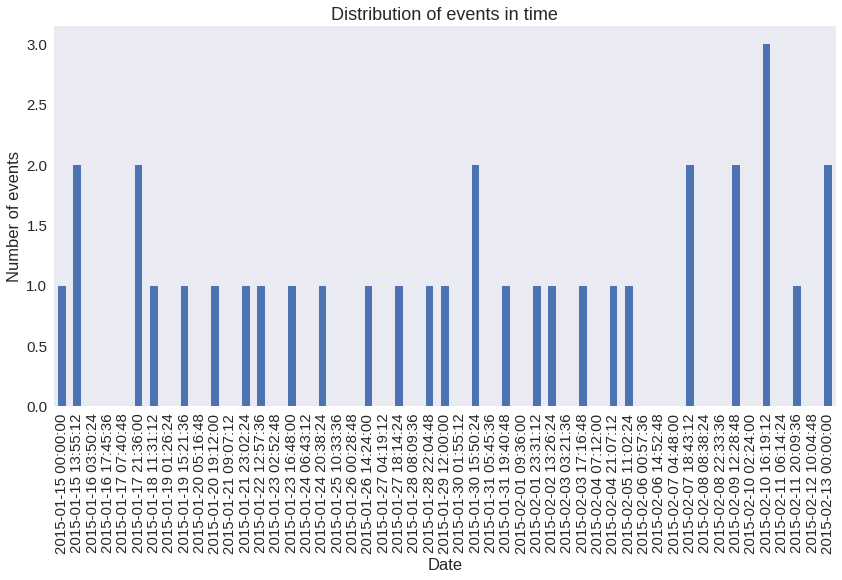

/home/lucasca/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


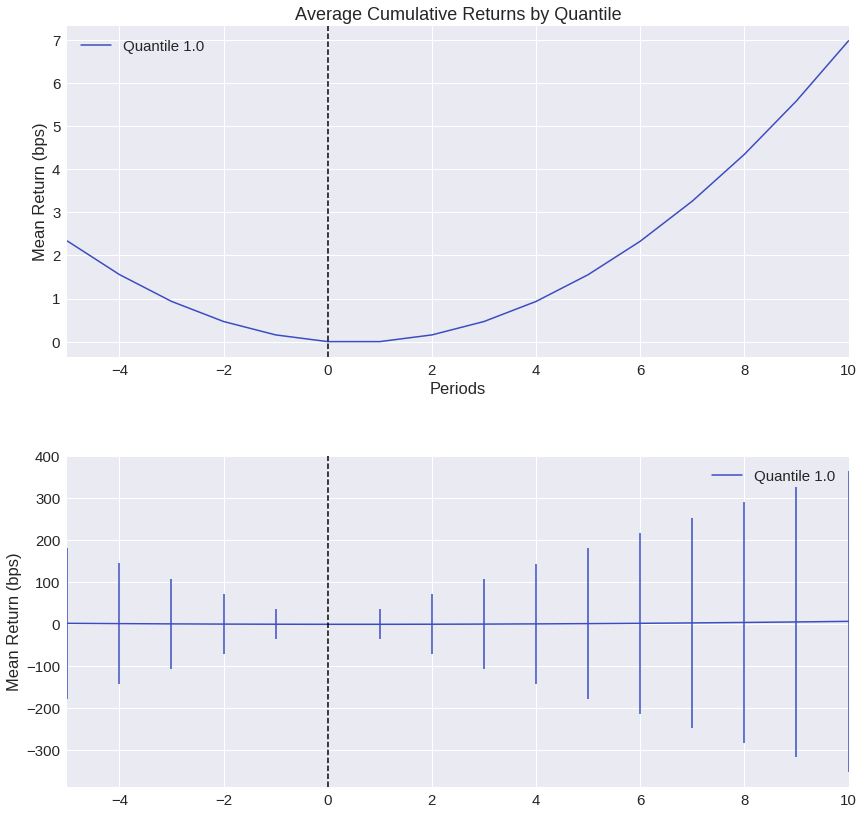

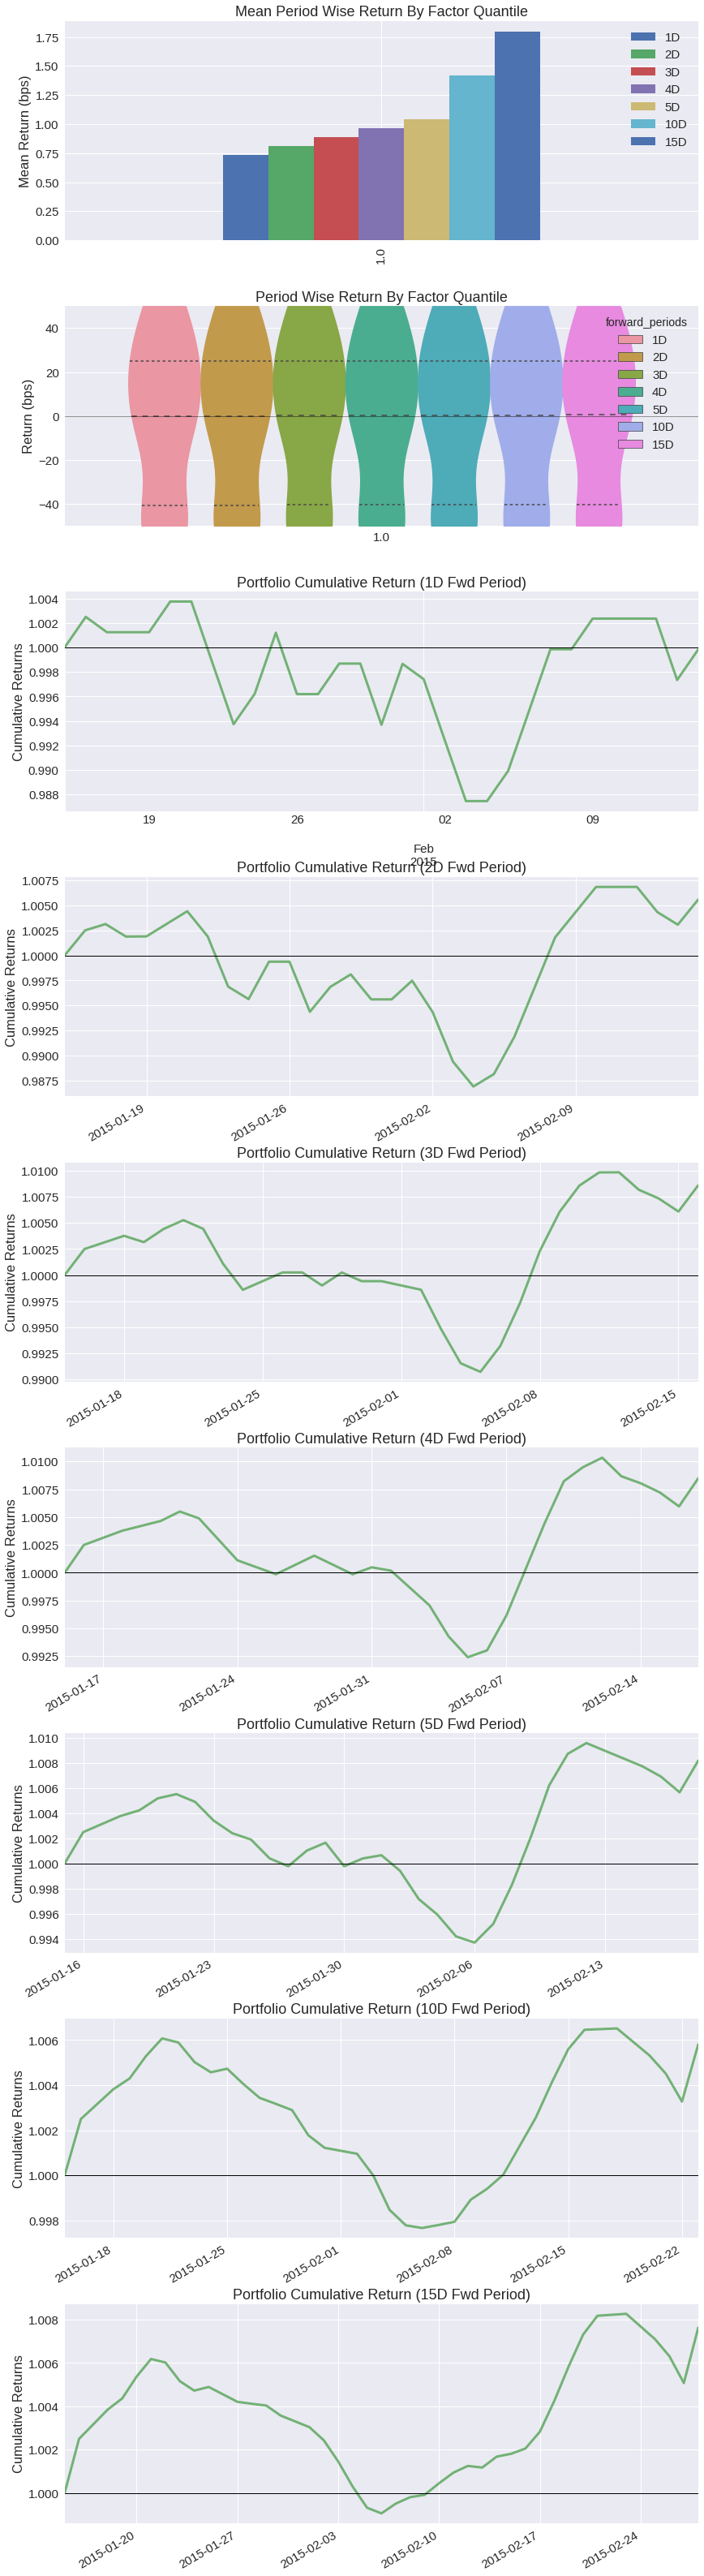

In [9]:
create_event_study_tear_sheet(event_data, prices, avgretplot=(5, 10))